In [ ]:
!pip install virtualenv
!virtualenv myenv
!source myenv/bin/activate
!pip install numpy==1.26.4 scipy==1.11.4 pandas==2.2.2 lxml==5.2.2 scikit-learn==1.5.0 joblib==1.4.2 statsmodels==0.14.2 lifelines==0.28.0 pygam==0.9.1 l0bnb==1.0.0 torch==2.3.0 torchvision==0.18.0 pytorch-lightning==2.2.5 torchinfo==1.8.0 torchmetrics==1.4.0.post0 ISLP==0.4.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 12.0 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 1976ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.3.1, setuptools==75.2.0, wheel==0.44.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

In [ ]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART


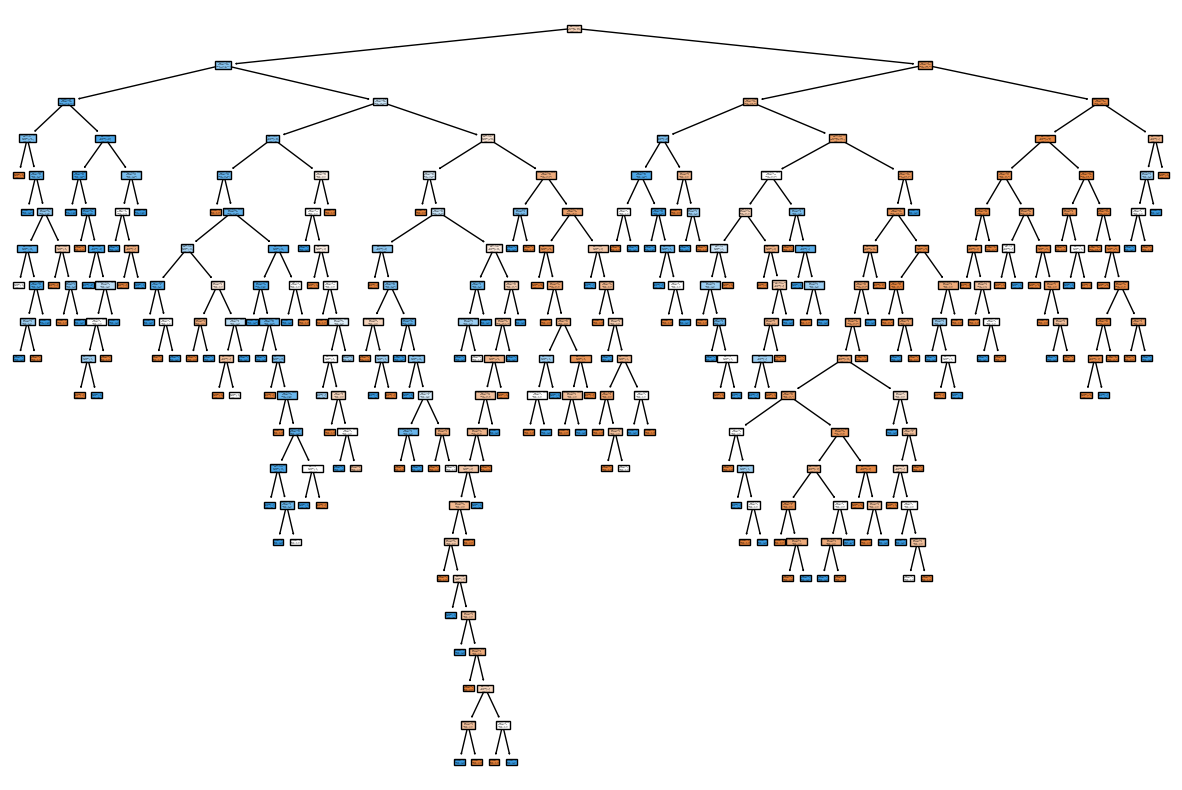

Training Error Rate: 0.0125
Number of Terminal Nodes: 174
|--- LoyalCH <= 0.50
|   |--- LoyalCH <= 0.28
|   |   |--- STORE <= 1.50
|   |   |   |--- ListPriceDiff <= 0.13
|   |   |   |   |--- class: 0
|   |   |   |--- ListPriceDiff >  0.13
|   |   |   |   |--- LoyalCH <= 0.13
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- LoyalCH >  0.13
|   |   |   |   |   |--- PriceDiff <= 0.23
|   |   |   |   |   |   |--- WeekofPurchase <= 233.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- WeekofPurchase >  233.50
|   |   |   |   |   |   |   |--- LoyalCH <= 0.20
|   |   |   |   |   |   |   |   |--- PriceDiff <= -0.09
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- PriceDiff >  -0.09
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- LoyalCH >  0.20
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- PriceDiff >  0.23
|   |   |   |   |   |   |--- LoyalCH <= 0.21
|   |   |   |   

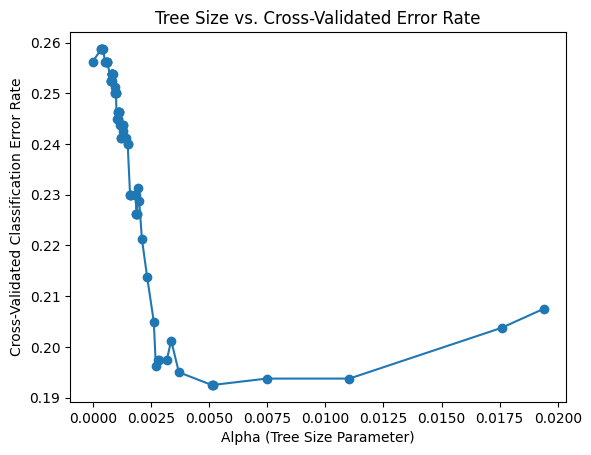

Tree size with lowest CV error rate: 10


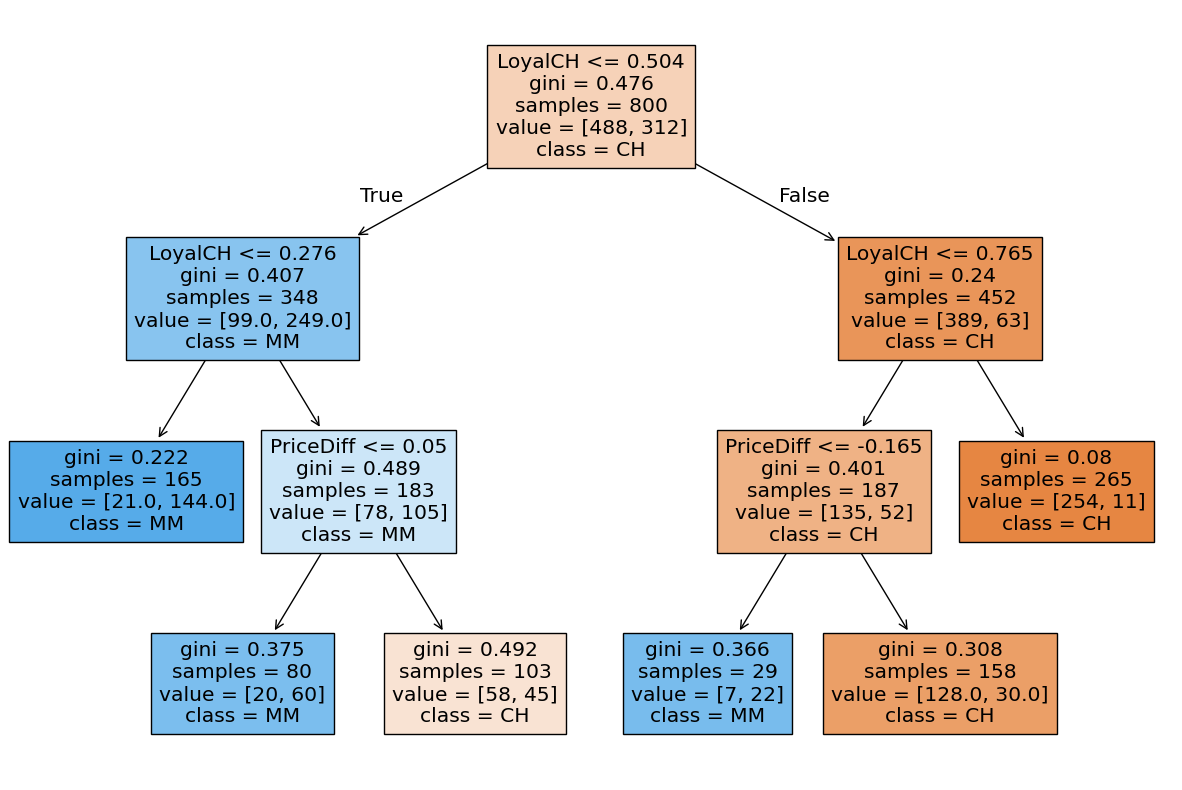

Training Error Rate (Unpruned Tree): 0.0125
Training Error Rate (Pruned Tree): 0.1675
Test Error Rate (Unpruned Tree): 0.2333
Test Error Rate (Pruned Tree): 0.1519


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from ISLP import load_data

# Load the OJ dataset
OJ = load_data('OJ')

# Split into features and target variable
X = OJ.drop(columns='Purchase')
y = OJ['Purchase']

# Convert categorical variables to numeric
X = pd.get_dummies(OJ.drop(columns='Purchase'), drop_first=True)

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(OJ['Purchase'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=800, random_state=42, stratify=y)

# Fit the tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Plot the tree with corrected class names and feature names
class_names = le.inverse_transform(tree.classes_)
feature_names = X.columns

plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

print(f"Training Error Rate: {1 - accuracy_score(y_train, tree.predict(X_train)):.4f}")

# Number of terminal nodes
terminal_nodes = tree.get_n_leaves()
print(f"Number of Terminal Nodes: {terminal_nodes}")

# 4. Produce a text summary of the tree
tree_summary = export_text(tree, feature_names=list(X.columns))
print(tree_summary)


# 5. Predict the response on the test data and produce a confusion matrix
y_test_pred = tree.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_test_pred)
test_error_rate = 1 - accuracy_score(y_test, y_test_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Test Error Rate: {test_error_rate:.4f}")

# 6. Use cross-validation to determine the optimal tree size
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # Exclude the maximum alpha
trees = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    trees.append((alpha, 1 - np.mean(scores)))

# Convert results to a DataFrame
cv_results = pd.DataFrame(trees, columns=['Alpha', 'Cross-Validated Error Rate'])

# 7. Produce a plot of tree size vs. cross-validated error rate
plt.plot(cv_results['Alpha'], cv_results['Cross-Validated Error Rate'], marker='o')
plt.xlabel('Alpha (Tree Size Parameter)')
plt.ylabel('Cross-Validated Classification Error Rate')
plt.title('Tree Size vs. Cross-Validated Error Rate')
plt.show()

# Find the index of the minimum cross-validated error rate
min_error_index = cv_results['Cross-Validated Error Rate'].idxmin()

# Get the corresponding alpha value
optimal_alpha = cv_results.loc[min_error_index, 'Alpha']

# Build a tree with the optimal alpha
optimal_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
optimal_tree.fit(X_train, y_train)

# Get the number of terminal nodes (tree size)
tree_size = optimal_tree.get_n_leaves()

# Print the tree size
print(f"Tree size with lowest CV error rate: {tree_size}")


# Prune the tree using the optimal alpha
optimal_alpha = 0.01  # Example value, replace with the actual optimal alpha from cross-validation
pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
pruned_tree.fit(X_train, y_train)

# Decode class names and ensure feature names match
class_names = le.inverse_transform(pruned_tree.classes_)
feature_names = X.columns

# Plot the pruned tree
plt.figure(figsize=(15, 10))
plot_tree(pruned_tree, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()


# 10. Compare training error rates
y_train_pruned_pred = pruned_tree.predict(X_train)
pruned_training_error_rate = 1 - accuracy_score(y_train, y_train_pruned_pred)

print(f"Training Error Rate (Unpruned Tree): {training_error_rate:.4f}")
print(f"Training Error Rate (Pruned Tree): {pruned_training_error_rate:.4f}")

# 11. Compare test error rates
y_test_pruned_pred = pruned_tree.predict(X_test)
pruned_test_error_rate = 1 - accuracy_score(y_test, y_test_pruned_pred)

print(f"Test Error Rate (Unpruned Tree): {test_error_rate:.4f}")
print(f"Test Error Rate (Pruned Tree): {pruned_test_error_rate:.4f}")







In [ ]:
#Question 2

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load Caravan dataset
from ISLP import load_data
Caravan = load_data('Caravan')

# Split data into predictors (X) and response (y)
X = Caravan.drop(columns='Purchase')
y = Caravan['Purchase']

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # 0 = No Purchase, 1 = Purchase

# Create training and test sets
X_train = X.iloc[:1000, :]
y_train = y[:1000]
X_test = X.iloc[1000:, :]
y_test = y[1000:]

# Fit a Gradient Boosting model
boosting_model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, random_state=42)
boosting_model.fit(X_train, y_train)

# Identify the most important predictors
feature_importance = pd.Series(boosting_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display the top predictors
print("Top Predictors:")
print(feature_importance.head(10))


# Predict probabilities on the test data
y_test_probs = boosting_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Purchase)

# Predict Purchase if probability > 0.2
y_test_pred = (y_test_probs > 0.2).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Fraction of correct purchases among those predicted
precision = conf_matrix[1, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])  # TP / (TP + FP)

print("Confusion Matrix:")
print(conf_matrix)

print(f"Fraction of Correct Purchases Among Predicted: {precision:.4f}")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



# Fit KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_test_knn_pred = knn.predict(X_test)

# Confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_test_knn_pred)

# Fit Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_test_log_reg_pred = log_reg.predict(X_test)

# Confusion matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_test_log_reg_pred)

# Print results for comparison
print("Confusion Matrix for KNN:")
print(conf_matrix_knn)

print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_log_reg)



Top Predictors:
PPERSAUT    0.075172
MOSTYPE     0.063421
ABRAND      0.056356
MGODGE      0.052887
MKOOPKLA    0.049996
MOPLHOOG    0.045873
MGODPR      0.034864
MBERMIDD    0.034801
PPLEZIER    0.032560
PBRAND      0.030178
dtype: float64
Confusion Matrix:
[[4335  198]
 [ 251   38]]
Fraction of Correct Purchases Among Predicted: 0.1610
Confusion Matrix for KNN:
[[4502   31]
 [ 285    4]]
Confusion Matrix for Logistic Regression:
[[4496   37]
 [ 278   11]]


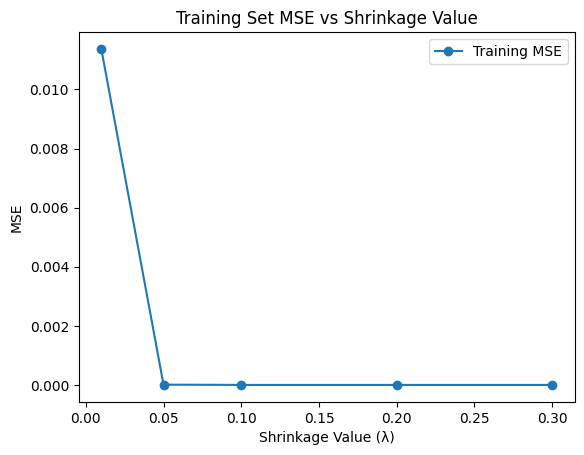

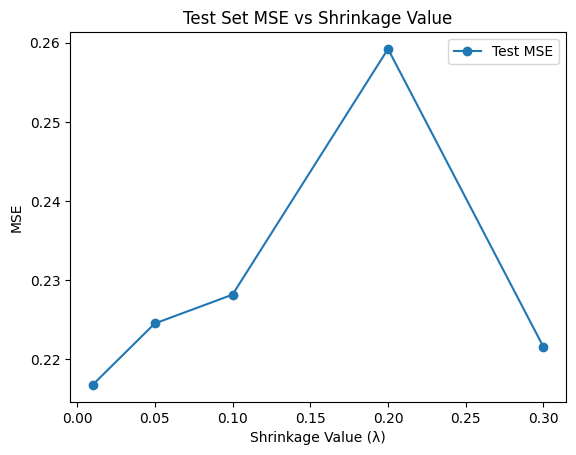

Most Important Predictors:
CAtBat    0.552448
CHits     0.069572
CRBI      0.046614
AtBat     0.046396
Walks     0.046393
CRuns     0.046375
CHmRun    0.036434
Hits      0.033169
Years     0.025421
CWalks    0.024364
dtype: float64
Test Set MSE for Bagging: 0.2283


In [ ]:
#Question 3
Boston = load_data('Hitters')

import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Simulate loading the Hitters dataset
# If ISLP is not available, upload the dataset as a CSV file or equivalent
try:
    from ISLP import load_data
    Hitters = load_data('Hitters')
except ImportError:
    print("Please upload the Hitters dataset or install the ISLP package.")

# Remove missing salary observations
Hitters = Hitters.dropna(subset=['Salary'])

# Log-transform the Salary column
Hitters['Salary'] = np.log(Hitters['Salary'])



# Split the dataset into predictors and target variable
X = Hitters.drop(columns='Salary')
y = Hitters['Salary']

# Convert categorical variables to numeric format
X = pd.get_dummies(X, drop_first=True)

# Create training and test sets
X_train = X.iloc[:200, :]
y_train = y.iloc[:200]
X_test = X.iloc[200:, :]
y_test = y.iloc[200:]




# Define a range of shrinkage (learning rate) values
shrinkage_values = [0.01, 0.05, 0.1, 0.2, 0.3]
train_mse = []
test_mse = []

# Train Gradient Boosting models for different shrinkage values
for shrinkage in shrinkage_values:
    boosting_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=shrinkage, random_state=42)
    boosting_model.fit(X_train, y_train)

    # Predict and calculate MSE for training and test sets
    y_train_pred = boosting_model.predict(X_train)
    y_test_pred = boosting_model.predict(X_test)

    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Plot training set MSE
plt.plot(shrinkage_values, train_mse, marker='o', label='Training MSE')
plt.xlabel('Shrinkage Value (λ)')
plt.ylabel('MSE')
plt.title('Training Set MSE vs Shrinkage Value')
plt.legend()
plt.show()

# Plot test set MSE
plt.plot(shrinkage_values, test_mse, marker='o', label='Test MSE')
plt.xlabel('Shrinkage Value (λ)')
plt.ylabel('MSE')
plt.title('Test Set MSE vs Shrinkage Value')
plt.legend()
plt.show()



# Fit the final boosting model with the best shrinkage value (e.g., 0.1)
best_shrinkage = 0.1  # Replace with the optimal shrinkage value found above
final_boosting_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=best_shrinkage, random_state=42)
final_boosting_model.fit(X_train, y_train)

# Extract feature importance
feature_importance = pd.Series(final_boosting_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display the most important predictors
print("Most Important Predictors:")
print(feature_importance.head(10))


# Fit a Bagging model
bagging_model = BaggingRegressor(n_estimators=1000, random_state=42)
bagging_model.fit(X_train, y_train)

# Predict on the test set and calculate MSE
y_test_bagging_pred = bagging_model.predict(X_test)
test_mse_bagging = mean_squared_error(y_test, y_test_bagging_pred)

print(f"Test Set MSE for Bagging: {test_mse_bagging:.4f}")

